In [5]:
# Importing Libraires and dependencies :
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
import yfinance as yf

In [11]:
data = yf.download("^GSPC")

[*********************100%%**********************]  1 of 1 completed


In [13]:
data = data["Close"]

In [125]:
def window_data(data,look_back,window):
    X= []
    y=[]
    for i in range(len(data)-look_back -window +1):
        features = data.iloc[i:(i+look_back)]

        target = data.iloc[(i+look_back):(i+look_back+window)]
        X.append(features)
        y.append(target)
    return np.array(X),np.array(y)

In [206]:
x,y = window_data(data=data[-2000:],look_back=40,window=5)

In [207]:
split = int(0.7*len(x))
x_train = x[:split]
x_test = x[split:]
y_train = y[:split]
y_test = y[split:]

In [208]:
x_train[3]

array([2058.68994141, 2084.38989258, 2064.45996094, 2064.11010742,
       2046.60998535, 2066.65991211, 2047.20996094, 2047.63000488,
       2040.04003906, 2052.32006836, 2048.04003906, 2076.06005859,
       2090.54003906, 2090.10009766, 2099.06005859, 2096.94995117,
       2099.33007812, 2105.26000977, 2099.12988281, 2109.40991211,
       2112.12988281, 2119.12011719, 2115.47998047, 2096.07006836,
       2079.06005859, 2075.32006836, 2071.5       , 2077.98999023,
       2071.2199707 , 2083.25      , 2088.89990234, 2085.44995117,
       2113.32006836, 2037.41003418, 2000.54003906, 2036.08996582,
       2070.77001953, 2098.86010742, 2102.94995117, 2088.55004883])

In [209]:
x_train.shape,y_train.shape

((1369, 40), (1369, 5))

In [210]:
x_test.shape,y_test.shape

((587, 40), (587, 5))

In [211]:
scaler = MinMaxScaler()

In [212]:
x_train_scaled = scaler.fit(x_train)
x_train_scaled =scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [213]:
y_train_scaled = scaler.fit(y_train)
y_train_scaled = scaler.transform(y_train)
y_test_scaled = scaler.transform(y_test)

In [214]:
x_train_scaled.shape

(1369, 40)

In [220]:
nn = Sequential()

In [221]:
nn.add(LSTM(units=10,return_sequences=True ,input_shape = (x_train.shape[1],1),activation ='relu'))
nn.add(Dropout(0.2))

In [222]:
nn.add(LSTM(20,return_sequences=True))
nn.add(Dropout(0.2))

In [223]:
nn.add(LSTM(10,))
nn.add(Dropout(0.2))

In [224]:
nn.add(Dense(5))

In [225]:
model = nn.compile(optimizer='adam',loss='mean_squared_error')

In [226]:
nn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_31 (LSTM)              (None, 40, 10)            480       
                                                                 
 dropout_30 (Dropout)        (None, 40, 10)            0         
                                                                 
 lstm_32 (LSTM)              (None, 40, 20)            2480      
                                                                 
 dropout_31 (Dropout)        (None, 40, 20)            0         
                                                                 
 lstm_33 (LSTM)              (None, 10)                1240      
                                                                 
 dropout_32 (Dropout)        (None, 10)                0         
                                                                 
 dense_10 (Dense)            (None, 5)               

In [227]:
nn.fit(x_train_scaled,y_train_scaled,batch_size=10,epochs=10,shuffle=False,validation_split=0.2)

Epoch 1/10
110/110 [==============================] - 12s 87ms/step - loss: 0.0111 - val_loss: 0.1481
Epoch 2/10
110/110 [==============================] - 9s 79ms/step - loss: 0.0156 - val_loss: 0.0639
Epoch 3/10
110/110 [==============================] - 9s 81ms/step - loss: 0.0107 - val_loss: 0.0331
Epoch 4/10
110/110 [==============================] - 9s 80ms/step - loss: 0.0071 - val_loss: 0.0130
Epoch 5/10
110/110 [==============================] - 9s 80ms/step - loss: 0.0059 - val_loss: 0.0175
Epoch 6/10
110/110 [==============================] - 9s 80ms/step - loss: 0.0052 - val_loss: 0.0226
Epoch 7/10
110/110 [==============================] - 9s 81ms/step - loss: 0.0041 - val_loss: 0.0187
Epoch 8/10
110/110 [==============================] - 9s 80ms/step - loss: 0.0034 - val_loss: 0.0219
Epoch 9/10
110/110 [==============================] - 9s 81ms/step - loss: 0.0034 - val_loss: 0.0231
Epoch 10/10
110/110 [==============================] - 9s 80ms/step - loss: 0.0034 - val_l

In [228]:
nn.evaluate(x_test_scaled,y_test_scaled)

19/19 [==============================] - 0s 19ms/step - loss: 0.0316


0.03164336830377579

In [229]:
y_test_scaled.shape

(587, 5)

In [230]:
predictions = nn.predict(x_test_scaled)

19/19 [==============================] - 1s 17ms/step


In [231]:
pred_prices = scaler.inverse_transform(predictions)
real_prices = scaler.inverse_transform(y_test_scaled)

In [236]:
price = pd.DataFrame({'y_actual': real_prices[-1].ravel(),'y_pred' : pred_prices[-1].ravel()},index =[i for i in range(5)])

<Axes: >

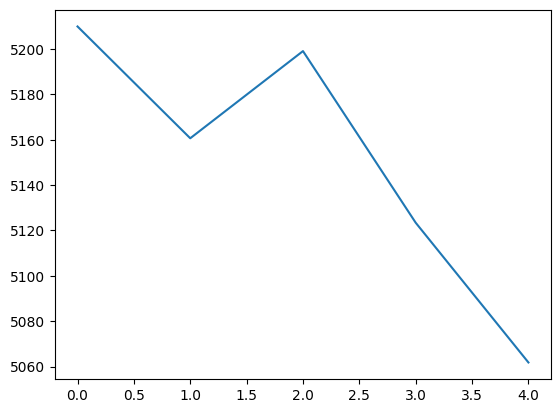

In [237]:
price.y_actual.plot()

<Axes: >

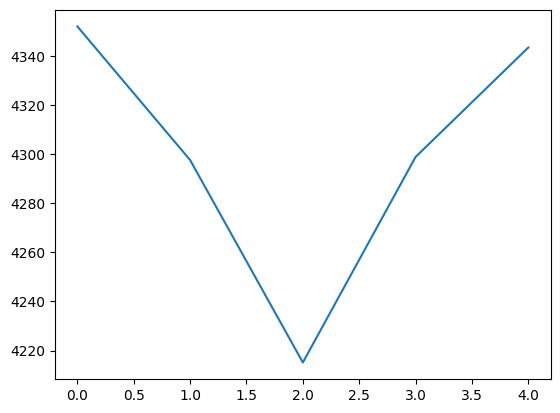

In [238]:
price.y_pred.plot()